In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm

In [50]:
kunden_df = pd.read_csv('H:\Documents\Abschlussprojekt\kunden.csv', sep=';')
print(kunden_df)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]


In [51]:
kunden_df.shape

(1104, 6)

# Aufgabe 1

In [52]:
anzahl_autokauf = len(kunden_df)
print(anzahl_autokauf)

1104


In [53]:
kunden_df.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

# Aufgabe 2

In [54]:
preise = kunden_df.iloc[:, 2]

hoechstpreis = preise.max()
mindestpreis = preise.min()
durchschnittspreis = preise.mean()

print(f"Höchstpreis: {hoechstpreis}")
print(f"Mindestpreis: {mindestpreis}")
print(f"Durchschnittspreis: {durchschnittspreis}")

Höchstpreis: 165482.31
Mindestpreis: 21471.65
Durchschnittspreis: 88975.19871376813


# Aufgabe 3

In [55]:
Gesamtumsatz = durchschnittspreis*anzahl_autokauf

print(f"Gesamtumsatz: {Gesamtumsatz:.2f} Euro")

Gesamtumsatz: 98228619.38 Euro


# Aufgabe 4

In [56]:
bundesland_df = pd.read_csv('H:\Documents\Abschlussprojekt\geo.txt', sep='\t')
print(bundesland_df)

     KundeNr          Niederlassung
0      K0001                Sachsen
1      K0002                    NRW
2      K0003                 Hessen
3      K0004                 Bayern
4      K0005                 Bayern
...      ...                    ...
1990   K1991                 Hessen
1991   K1992      Baden-Württemberg
1992   K1993    Nordrhein-Westfalen
1993   K1994                 Berlin
1994   K1995  Berlin-Charlottenburg

[1995 rows x 2 columns]


In [57]:
bundesland_df.dtypes

KundeNr          object
Niederlassung    object
dtype: object

In [58]:
bundesland_df['Niederlassung'] = bundesland_df['Niederlassung'].replace(['NRW', 'Düsseldorf'], 'Nordrhein-Westfalen')
print(bundesland_df)

     KundeNr          Niederlassung
0      K0001                Sachsen
1      K0002    Nordrhein-Westfalen
2      K0003                 Hessen
3      K0004                 Bayern
4      K0005                 Bayern
...      ...                    ...
1990   K1991                 Hessen
1991   K1992      Baden-Württemberg
1992   K1993    Nordrhein-Westfalen
1993   K1994                 Berlin
1994   K1995  Berlin-Charlottenburg

[1995 rows x 2 columns]


In [59]:
bundesland_df['Niederlassung'] = bundesland_df['Niederlassung'].replace(['Berlin-Charlottenburg', 'Berlin-Mitte', 'BERLIN'], 'Berlin'
                                                                       )
print(bundesland_df)

     KundeNr        Niederlassung
0      K0001              Sachsen
1      K0002  Nordrhein-Westfalen
2      K0003               Hessen
3      K0004               Bayern
4      K0005               Bayern
...      ...                  ...
1990   K1991               Hessen
1991   K1992    Baden-Württemberg
1992   K1993  Nordrhein-Westfalen
1993   K1994               Berlin
1994   K1995               Berlin

[1995 rows x 2 columns]


In [60]:
bundesland_auto = bundesland_df['Niederlassung'].value_counts()
print(bundesland_auto)

Niederlassung
Baden-Württemberg      382
Bayern                 338
Nordrhein-Westfalen    327
Berlin                 236
Niedersachsen          169
Hessen                 165
Sachsen                162
Thüringen               89
Hamburg                 67
Brandenburg             60
Name: count, dtype: int64


# Aufgabe 5

In [61]:
bundesland_auto = {
    'Baden-Württemberg': 382,
    'Bayern': 338,
    'Nordrhein-Westfalen': 327,
    'Berlin': 236,
    'Niedersachsen': 169,
    'Hessen': 165,
    'Sachsen': 162,
    'Thüringen': 89,
    'Hamburg': 67,
    'Brandenburg': 60
}

bundesland_durchschnitt = {bundesland: durchschnittspreis * anzahl_autos for bundesland, anzahl_autos in bundesland_auto.items()}

for bundesland, gesamtumsatz in bundesland_durchschnitt.items():
    print(f"{bundesland}: {gesamtumsatz:.2f}")

Baden-Württemberg: 33988525.91
Bayern: 30073617.17
Nordrhein-Westfalen: 29094889.98
Berlin: 20998146.90
Niedersachsen: 15036808.58
Hessen: 14680907.79
Sachsen: 14413982.19
Thüringen: 7918792.69
Hamburg: 5961338.31
Brandenburg: 5338511.92


# Aufgabe 6

In [62]:
anzahl_männer = len(kunden_df[kunden_df['Geschlecht'] == 1])
anzahl_frauen = len(kunden_df[kunden_df['Geschlecht'] == 0])

print(f"männer: {anzahl_männer}")
print(f"frauen: {anzahl_frauen}")

if anzahl_männer > anzahl_frauen:
    print("Es gibt mehr männliche Käufer.")
elif anzahl_männer < anzahl_frauen:
    print("Es gibt mehr weibliche Käufer.")
else:
    print("Es gibt gleich viele Männer und Frauen.")

männer: 701
frauen: 398
Es gibt mehr männliche Käufer.


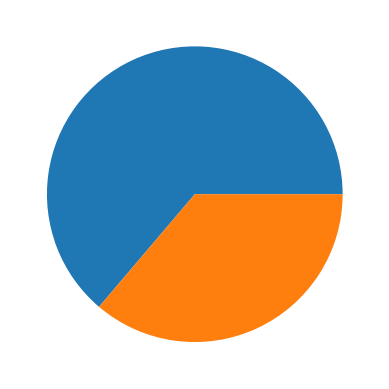

In [63]:
x = np.array([701, 398])
plt.pie(x)
plt.show()

# Aufgabe 7

In [64]:
alter_zählen = kunden_df[kunden_df['Alter'] <= 75]

if not alter_zählen.empty:
    durchschnittsalter = alter_zählen['Alter'].mean()
    print(f'Durchschnittsalter Kunden: {durchschnittsalter:.1f}')
else:
    print('Es gibt keine Personen mit einem Alter unter 75.')

Durchschnittsalter Kunden: 50.4


# Aufgabe 8

In [65]:
besucher_df = pd.read_csv('H:\\Documents\\Abschlussprojekt\\besucher.csv', sep=';')
print(besucher_df)

     Alter           Einkommen  Geschlecht  Zeit KundeNr
0       30    39919,0953348874           0  29,0   K1814
1       41   53430,67308587748           0  27,0   K1544
2       64    73163,2169267002           0  32,0   K1945
3       41  36761,482581315344           0  44,0   K1825
4       35   42684,33163178136           1  33,0   K1144
..     ...                 ...         ...   ...     ...
886     32   34391,82496545645           1  48,0   K1211
887     41   68516,49543941053           0  34,0   K1375
888     65   89685,33344089528           0  23,0   K1965
889     68   95714,30526812703           0  32,0   K1540
890     49    73319,1870845747           0  27,0   K1207

[891 rows x 5 columns]


In [66]:
alter_zählen = besucher_df[besucher_df['Alter'] <= 75]

if not alter_zählen.empty:
    durchschnittsalter = alter_zählen['Alter'].mean()
    print(f'Durchschnittsalter Besucher: {durchschnittsalter:.1f} Jahre')
else:
    print('Es gibt keine Personen mit einem Alter unter 75.')

Durchschnittsalter Besucher: 49.9 Jahre


# Aufgabe 9

In [67]:
männlich_zählen = kunden_df[(kunden_df['Geschlecht'] == 1) & (kunden_df['Alter'] < 75)]


durchschnittsalter_männlich = männlich_zählen['Alter'].mean()

print(f'Durchschnittsalter männlicher Kunden: {durchschnittsalter_männlich:.2f} Jahre')

Durchschnittsalter männlicher Kunden: 50.42 Jahre


# Aufgabe 10

In [68]:
einkommen_zählen = kunden_df[(kunden_df['Einkommen'] <= 300000) & (kunden_df['Einkommen'] > 0)]
durchschnittseinkommen = einkommen_zählen['Einkommen'].mean()
print(f'Durchschnittseinkommen Kunden: {durchschnittseinkommen: .2f}€')

Durchschnittseinkommen Kunden:  58894.68€


# Aufgabe 11

Pearson-Korrelation: Alter, Einkommen, Preis & Zeit
              Alter  Einkommen     Preis      Zeit
Alter      1.000000   0.043574  0.770675  0.585900
Einkommen  0.043574   1.000000 -0.001685  0.021593
Preis      0.770675  -0.001685  1.000000  0.707778
Zeit       0.585900   0.021593  0.707778  1.000000


<Axes: >

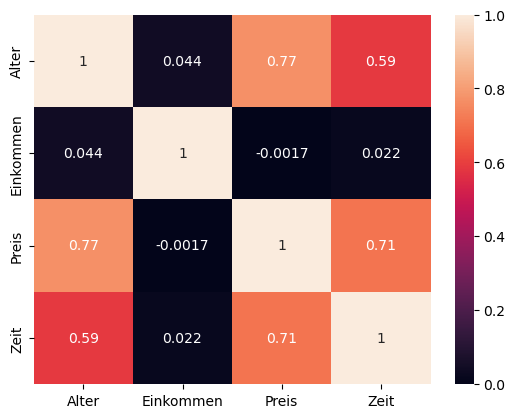

In [69]:
spalten_variablen = ['Alter', 'Einkommen', 'Preis', 'Zeit']
matrix_df = kunden_df[spalten_variablen]


korrelation_matrix = matrix_df.corr(method='pearson')

print('Pearson-Korrelation: Alter, Einkommen, Preis & Zeit')
print(korrelation_matrix)
df_corr = matrix_df.select_dtypes(include = np.number)
sns.heatmap(df_corr.corr(), annot = True)

# Aufgabe 12

In [70]:
besucher_df['Zeit'] = besucher_df['Zeit'].astype(object)
besucher_zeit = besucher_df['Zeit'].sum()

kunden_zeit = kunden_df['Zeit'].sum()

print("Summe der Zeit für Besucher:", besucher_zeit)
print("Summe der Zeit für Kunden:", kunden_zeit)

Summe der Zeit für Besucher: 29,027,032,044,033,027,059,040,031,044,035,037,025,056,030,034,033,040,021,049,037,021,025,046,021,014,046,037,034,044,030,046,046,021,046,022,030,054,057,049,033,045,043,038,047,021,045,027,041,042,030,050,050,035,031,024,037,044,037,049,044,030,039,028,027,051,044,040,023,036,035,034,019,025,044,036,025,037,036,041,028,030,034,046,033,028,015,052,045,046,042,019,045,042,032,036,030,036,022,035,030,024,045,041,036,05,027,035,023,029,035,036,034,012,026,062,052,042,021,028,020,029,045,039,025,040,017,037,047,021,042,029,032,043,023,044,044,055,038,039,036,025,034,029,034,055,060,032,032,036,026,031,041,048,033,044,059,041,03,026,034,031,035,031,036,048,050,037,036,036,040,032,041,032,041,013,045,043,038,024,041,025,030,018,024,050,031,024,045,025,020,017,045,019,030,047,043,037,034,025,034,036,044,030,032,027,033,044,039,031,028,053,040,044,043,036,030,032,040,049,034,031,041,015,028,022,026,032,047,055,047,014,027,041,031,026,045,026,027,018,032,018,020,03

In [71]:
durchschnittszeit_kunden = kunden_zeit / anzahl_autokauf
print(f'Durchschnittszeit pro Kunde: {durchschnittszeit_kunden:.1F}')

Durchschnittszeit pro Kunde: 44.4


In [72]:
besucher_df.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

# Aufgabe 13

In [73]:
kunden_df['Kredit genommen'] = kunden_df['Einkommen'] < kunden_df['Preis']

kunden_ohne_kredit = kunden_df['Kredit genommen'].value_counts().get(False, 0)
kunden_mit_kredit = kunden_df['Kredit genommen'].value_counts().get(True, 0)

print("Anzahl Kunden ohne Kredit:", kunden_ohne_kredit)
print("Anzahl Kunden mit Kredit:", kunden_mit_kredit)

Anzahl Kunden ohne Kredit: 6
Anzahl Kunden mit Kredit: 1098


Verteilung Kredite


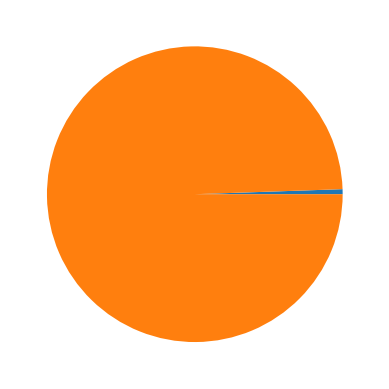

In [74]:
y = np.array([6, 1098])

print('Verteilung Kredite')
plt.pie(y)
plt.show()

# Aufgabe 14

In [81]:
X = kunden_df[['Einkommen']]
X = sm.add_constant(X)
y = kunden_df['Preis']

regressionsmodel1 = sm.OLS(y, X).fit()

print(regressionsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003130
Date:                Tue, 26 Dec 2023   Prob (F-statistic):              0.955
Time:                        11:31:14   Log-Likelihood:                -12722.
No. Observations:                1104   AIC:                         2.545e+04
Df Residuals:                    1102   BIC:                         2.546e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.898e+04    736.993    120.729      0.0

In [79]:
from statsmodels.api import add_constant
X_predict = pd.DataFrame({
    'Einkommen': [30000, 54000],           
    'Alter': [32, 51]        
})

X_predict = add_constant(X_predict, has_constant='add')
X_predict

,const,Einkommen,Alter
0,1.0,30000,32
1,1.0,54000,51
